In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm
import time

from sklearn.model_selection import train_test_split

D:\Users\Alex\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

import torchvision

import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision import models

In [3]:
from functions_v2 import(import_folder_dataset,
                         Data,
                         calculate_IoU,
                         plot_loss_accuracy, 
                         save_model,
                         save_metrics,
                         make_predictions)

# 1. Build an image segmentation model using pytorch

In [4]:
# Learning parameters.
epochs = 50 # Number of epochs to train the model
lr = 0.01 # Learning rate.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)


TRAIN_BATCH_SIZE = 4
TEST_BATCH_SIZE = 4

checkpoints_save = 25 # Save after 100 epochs


model_checkpoints = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Computer Vision/Project/Project 3/CheckPoints/"

cuda


In [5]:
#PyTorch - Building the Model
class SegmentationNet(nn.Module):
    def __init__(self):
        super(SegmentationNet, self).__init__()
        
        #################################
        ############ Encoder ############
        #################################
        
        '''
        In dimension:              1024 * 1024 * 3 
        Out dimension Conv:        1024 * 1024 * 64
        Out dimension MaxPooling:  512  * 512  * 64
        '''
        self.cnn1_model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        
        self.maxpool1 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              512  * 512  * 64
        Out dimension Conv:        512  * 512  * 128
        Out dimension MaxPooling:  256  * 256  * 128
        '''
        self.cnn2_model = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        
        self.maxpool2 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              256  * 256  * 128
        Out dimension Conv:        256  * 256  * 256
        Out dimension MaxPooling:  128  * 128  * 256
        '''
        self.cnn3_model = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        
        self.maxpool3 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              128 * 128 * 256
        Out dimension Conv:        128 * 128 * 512
        Out dimension MaxPooling:  64  * 64  * 512
        '''
        self.cnn4_model = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        
        self.maxpool4 = nn.MaxPool2d(2, stride=2)
        
        '''
        In dimension:              64 * 64 * 512
        Out dimension Conv:        64 * 64 * 1024
        Out dimension MaxPooling:  32 * 32 * 1024
        '''
        '''
        self.cnn5_model = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU()
        )
        
        self.maxpool5 = nn.MaxPool2d(2, stride=2)
        '''
        #################################
        ############ Decoder ############
        #################################
        
        '''
        In dimension:                 32 * 32 * 1024
        Out dimension Conv:           32 * 32 * 512
        Out dimension ConvTranspose:  64 * 64 * 512
        '''
        '''
        self.tcnn1_model = nn.Sequential(
            nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.convTrans1 = nn.ConvTranspose2d(in_channels=512, out_channels=512, kernel_size=3, stride=2, padding=1, output_padding=1)
        '''
        
        '''
        In dimension:                 64  * 64  * 512
        Out dimension Conv:           64  * 64  * 256
        Out dimension ConvTranspose:  128 * 128 * 256
        '''
        self.tcnn2_model = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.convTrans2 = nn.ConvTranspose2d(in_channels=256, out_channels=256, kernel_size=3, stride=2, padding=1, output_padding=1)
        
        
        '''
        In dimension:                 128 * 128 * 256
        Out dimension Conv:           128 * 128 * 128
        Out dimension ConvTranspose:  256 * 256 * 128
        '''
        self.tcnn3_model = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.convTrans3 = nn.ConvTranspose2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=1, output_padding=1)
        
        
        '''
        In dimension:                 256 * 256 * 128
        Out dimension Conv:           256 * 256 * 64
        Out dimension ConvTranspose:  512 * 512 * 64
        '''
        self.tcnn4_model = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.convTrans4 = nn.ConvTranspose2d(in_channels=64, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1)
        
        
        '''
        In dimension:                 512  * 512  * 64
        Out dimension Conv:           512  * 512  * 32
        Out dimension ConvTranspose:  1024 * 1024 * 32
        '''
        self.tcnn5_model = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.convTrans5 = nn.ConvTranspose2d(in_channels=32, out_channels=32, kernel_size=3, stride=2, padding=1, output_padding=1)
        
        ######################################
        ############ Segmentation ############
        ######################################
        
        '''
        In dimension:                 1024 * 1024 * 32
        Out dimension Conv:           1024 * 1024 * 2
        '''
        self.segmentation = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=8, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.Conv2d(in_channels=8, out_channels=2, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(2),
            nn.ReLU()
        )
        
    def forward(self, x): 
        
        #################################
        ############ Encoder ############
        #################################
        #print("Before Cnn1 ",x.shape)
        # Convolution
        x = self.cnn1_model(x)
        #print("Before MaxPool1 ",x.shape)
        # Max pooling
        x = self.maxpool1(x)
        
        #print("Before Cnn2 ",x.shape)
        # Convolution
        x = self.cnn2_model(x)
        #print("Before MaxPool2 ",x.shape)
        # Max pooling
        x = self.maxpool2(x)
        
        #print("Before Cnn3 ",x.shape)
        # Convolution
        x = self.cnn3_model(x)
        #print("Before MaxPool3 ",x.shape)
        # Max pooling
        x = self.maxpool3(x)
        
        #print("Before Cnn4 ",x.shape)
        # Convolution
        x = self.cnn4_model(x)
        #print("Before MaxPool4 ",x.shape)
        # Max pooling
        x = self.maxpool4(x)
        
        # Convolution
        #x = self.cnn5_model(x)
        # Max pooling
        #x = self.maxpool5(x)
        
        #################################
        ############ Decoder ############
        #################################
        
        # Convolution
        #x = self.tcnn1_model(x)
        # Transopose Convolution
        #x = self.convTrans1(x)
        
        #print("Before TCnn2 ",x.shape)
        # Convolution
        x = self.tcnn2_model(x)
        #print("Before ConvTransl2 ",x.shape)
        # Transopose Convolution
        x = self.convTrans2(x)
        
        #print("Before TCnn3 ",x.shape)
        # Convolution
        x = self.tcnn3_model(x)
        #print("Before ConvTransl3 ",x.shape)
        # Transopose Convolution
        x = self.convTrans3(x)
        
        #print("Before TCnn4 ",x.shape)
        # Convolution
        x = self.tcnn4_model(x)
        #print("Before ConvTransl4 ",x.shape)
        # Transopose Convolution
        x = self.convTrans4(x)
        
        #print("Before TCnn5 ",x.shape)
        # Convolution
        x = self.tcnn5_model(x)
        #print("Before ConvTransl5 ",x.shape)
        # Transopose Convolution
        x = self.convTrans5(x)
        
        ######################################
        ############ Segmentation ############
        ######################################
        
        #print("Before Segmentation ",x.shape)
        # Convolution Segmentation
        x = self.segmentation(x)
        #print("After Segmentation ",x.shape)
        return x

In [6]:
#PyTorch - Visualizing the Model
modelpy = SegmentationNet().to(device) # Get the model, and if there is a GPU use it
print("model created")

# Loss function.
#criterion = nn.BCEWithLogitsLoss() # Set the loss function to BCEWithLogitsLoss
criterion = nn.CrossEntropyLoss()


parameters = filter(lambda p: p.requires_grad, modelpy.parameters())
optim = torch.optim.Adam(parameters, lr=lr)
#optim = torch.optim.SGD(params=parameters, lr=lr, momentum=0.9, weight_decay=1e-5)# , momentum=0.9, weight_decay=0.0005


# Check if checkpoint is available, if so, load it
epoch_check = 0
previous_time = 0

modelpy

model created


SegmentationNet(
  (cnn1_model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2_model): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn3_model): S

In [7]:
# Check if checkpoint is available, if so, load it
epoch_check = 0
previous_time = 0
names = os.listdir(model_checkpoints)
for elem in names:
    if(elem=="model_ckpt.pth"):
        print("Loading save chackpoint")
        checkpoint = torch.load(model_checkpoints + "model_ckpt.pth")
        modelpy.load_state_dict(checkpoint['model_state_dict'])
        modelpy.to(device)
        optim.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch_check = checkpoint['epoch']
        criterion  = checkpoint['loss']
        previous_time = checkpoint['time']
        print(f"Epoch of the checkpoint: {epoch_check}")



Loading save chackpoint
Epoch of the checkpoint: 50


In [8]:
# Model Parameters

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f"Model Parameters: {count_parameters(modelpy)}")

Model Parameters: 7826318


## Load data

In [8]:
# Path of the files
train_data_path = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Computer Vision/Project/Project 3/Data/Train"
test_data_path = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Computer Vision/Project/Project 3/Data/Test"

img_size = (256, 256) # (1024, 1024)

In [9]:
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    #transforms.Resize((1024, 1024)),
                                    transforms.Resize(img_size),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [10]:
train_data, train_mask, train_labels = import_folder_dataset(root_path = train_data_path, resized_side = img_size)#(1024,1024)

print("Dim of Data: ", train_data.shape)
print("Dim of Mask: ", train_mask.shape)
print("Dim of Lables: ", train_labels.shape)

100%|██████████| 800/800 [00:50<00:00, 15.92it/s]


Dim of Data:  (800, 256, 256, 3)
Dim of Mask:  (800, 256, 256, 3)
Dim of Lables:  (800, 256, 256)


In [11]:
# Split into Train, Validation
X_train, X_val, m_train, m_val, y_train, y_val = train_test_split(train_data, train_mask, train_labels, test_size=0.1, random_state=42)
print("Dim of Image Train: ", X_train.shape)
print("Dim of Mask Train: ", m_train.shape)
print("Dim of Lables Train: ", y_train.shape)


print("Dim of Image Validation: ", X_val.shape)
print("Dim of Mask Validation: ", m_val.shape)
print("Dim of Lables Validation: ", y_val.shape)

Dim of Image Train:  (720, 256, 256, 3)
Dim of Mask Train:  (720, 256, 256, 3)
Dim of Lables Train:  (720, 256, 256)
Dim of Image Validation:  (80, 256, 256, 3)
Dim of Mask Validation:  (80, 256, 256, 3)
Dim of Lables Validation:  (80, 256, 256)


In [12]:
# Create the dataset object
train_Dataset = Data(X_train, m_train, y_train, img_transform) # img_transform_2 img_transform
val_Dataset = Data(X_val, m_val, y_val, img_transform)

print("Train len: ",len(train_Dataset))
print("Val len: ",len(val_Dataset))

Train len:  720
Val len:  80


In [13]:
# Create the dataloaders
train_loader = DataLoader(
    train_Dataset, 
    batch_size=TRAIN_BATCH_SIZE,             
    shuffle=True)

valid_loader = DataLoader(
    val_Dataset, 
    batch_size=TEST_BATCH_SIZE,
    shuffle=False
    )

# 2. Train your model using [lung segmentation datasets](https://github.com/YoushanZhang/Lung_Segmentation)


Epoch 1 of 50


100%|██████████| 20/20 [00:03<00:00,  6.44it/s]


train loss:  0.08687183856964112
Val loss:  0.048229924589395526
train IoU:  0.576443767501688
Val IoU:  0.7765623241662979
Current time: 2.184 minutes. Time expected till completion: 107.013 minutes

Epoch 2 of 50


100%|██████████| 20/20 [00:03<00:00,  6.23it/s]


train loss:  0.04482223330479529
Val loss:  0.03544670147821307
train IoU:  0.7792116241322623
Val IoU:  0.818775075674057
Current time: 3.338 minutes. Time expected till completion: 80.110 minutes

Epoch 3 of 50


100%|██████████| 20/20 [00:03<00:00,  6.24it/s]


train loss:  0.03795097613086303
Val loss:  0.033515785727649926
train IoU:  0.8057113839520349
Val IoU:  0.8328080087900162
Current time: 4.504 minutes. Time expected till completion: 70.555 minutes

Epoch 4 of 50


100%|██████████| 20/20 [00:03<00:00,  6.28it/s]


train loss:  0.032660122039831346
Val loss:  0.03275875179097056
train IoU:  0.8252624577946133
Val IoU:  0.8394790589809418
Current time: 5.670 minutes. Time expected till completion: 65.204 minutes

Epoch 5 of 50


100%|██████████| 20/20 [00:03<00:00,  6.24it/s]


train loss:  0.030021750088781118
Val loss:  0.030859006755053996
train IoU:  0.8405614488654667
Val IoU:  0.8441654592752457
Current time: 6.838 minutes. Time expected till completion: 61.538 minutes

Epoch 6 of 50


100%|██████████| 20/20 [00:03<00:00,  6.24it/s]


train loss:  0.02840435652890139
Val loss:  0.028704014047980307
train IoU:  0.8486663225624297
Val IoU:  0.842892923951149
Current time: 8.005 minutes. Time expected till completion: 58.707 minutes

Epoch 7 of 50


100%|██████████| 20/20 [00:03<00:00,  6.19it/s]


train loss:  0.026275722889436616
Val loss:  0.027067722845822574
train IoU:  0.8586428764793608
Val IoU:  0.8520916640758515
Current time: 9.174 minutes. Time expected till completion: 56.355 minutes

Epoch 8 of 50


100%|██████████| 20/20 [00:03<00:00,  6.19it/s]


train loss:  0.02438515884698265
Val loss:  0.026354365330189467
train IoU:  0.8690884795453814
Val IoU:  0.872510415315628
Current time: 10.343 minutes. Time expected till completion: 54.300 minutes

Epoch 9 of 50


100%|██████████| 20/20 [00:03<00:00,  6.22it/s]


train loss:  0.02326917519999875
Val loss:  0.024606577586382627
train IoU:  0.8738988959127002
Val IoU:  0.8723612636327743
Current time: 11.512 minutes. Time expected till completion: 52.442 minutes

Epoch 10 of 50


100%|██████████| 20/20 [00:03<00:00,  6.24it/s]


train loss:  0.02213776971006559
Val loss:  0.025665061082690954
train IoU:  0.8794952273368836
Val IoU:  0.8632838547229766
Current time: 12.679 minutes. Time expected till completion: 50.717 minutes

Epoch 11 of 50


100%|██████████| 20/20 [00:03<00:00,  6.19it/s]


train loss:  0.02059640818172031
Val loss:  0.02448845636099577
train IoU:  0.8862682269679175
Val IoU:  0.8734414607286454
Current time: 13.848 minutes. Time expected till completion: 49.098 minutes

Epoch 12 of 50


100%|██████████| 20/20 [00:03<00:00,  6.24it/s]


train loss:  0.019691844201750224
Val loss:  0.02833411293104291
train IoU:  0.8906126297182507
Val IoU:  0.8560920298099518
Current time: 15.016 minutes. Time expected till completion: 47.551 minutes

Epoch 13 of 50


100%|██████████| 20/20 [00:03<00:00,  6.21it/s]


train loss:  0.019367619722874627
Val loss:  0.035718141589313745
train IoU:  0.8922956830925411
Val IoU:  0.8410528361797333
Current time: 16.185 minutes. Time expected till completion: 46.065 minutes

Epoch 14 of 50


100%|██████████| 20/20 [00:03<00:00,  6.22it/s]


train loss:  0.019108960648170775
Val loss:  0.025022776424884798
train IoU:  0.894003642598788
Val IoU:  0.8618281304836273
Current time: 17.354 minutes. Time expected till completion: 44.625 minutes

Epoch 15 of 50


100%|██████████| 20/20 [00:03<00:00,  6.12it/s]


train loss:  0.017350412651689517
Val loss:  0.02196438401006162
train IoU:  0.9025739192962646
Val IoU:  0.8829261511564255
Current time: 18.524 minutes. Time expected till completion: 43.222 minutes

Epoch 16 of 50


100%|██████████| 20/20 [00:03<00:00,  6.18it/s]


train loss:  0.016717640181175535
Val loss:  0.024980117799714208
train IoU:  0.9048216624392403
Val IoU:  0.8790795773267746
Current time: 19.692 minutes. Time expected till completion: 41.846 minutes

Epoch 17 of 50


100%|██████████| 20/20 [00:03<00:00,  6.24it/s]


train loss:  0.01772514911265009
Val loss:  0.0259073318913579
train IoU:  0.9005013349983427
Val IoU:  0.8708050042390824
Current time: 20.860 minutes. Time expected till completion: 40.493 minutes

Epoch 18 of 50


100%|██████████| 20/20 [00:03<00:00,  6.23it/s]


train loss:  0.016593646496120426
Val loss:  0.02260480085387826
train IoU:  0.9064580019977357
Val IoU:  0.8821797460317612
Current time: 22.027 minutes. Time expected till completion: 39.160 minutes

Epoch 19 of 50


100%|██████████| 20/20 [00:03<00:00,  6.22it/s]


train loss:  0.015266152755874727
Val loss:  0.023624656442552804
train IoU:  0.9130844063229031
Val IoU:  0.87690971493721
Current time: 23.195 minutes. Time expected till completion: 37.845 minutes

Epoch 20 of 50


100%|██████████| 20/20 [00:03<00:00,  6.21it/s]


train loss:  0.014769938857191139
Val loss:  0.027081217942759396
train IoU:  0.9153845734066434
Val IoU:  0.8783147543668747
Current time: 24.364 minutes. Time expected till completion: 36.546 minutes

Epoch 21 of 50


100%|██████████| 20/20 [00:03<00:00,  6.20it/s]


train loss:  0.0140873190222515
Val loss:  0.025890815583989025
train IoU:  0.918903277317683
Val IoU:  0.8754405021667481
Current time: 25.532 minutes. Time expected till completion: 35.258 minutes

Epoch 22 of 50


100%|██████████| 20/20 [00:03<00:00,  6.24it/s]


train loss:  0.013746703028058012
Val loss:  0.025299262441694736
train IoU:  0.9206361161337958
Val IoU:  0.8780996084213257
Current time: 26.700 minutes. Time expected till completion: 33.982 minutes

Epoch 23 of 50


100%|██████████| 20/20 [00:03<00:00,  6.23it/s]


train loss:  0.013497006003227499
Val loss:  0.028367657447233796
train IoU:  0.9219431519508362
Val IoU:  0.8763420224189759
Current time: 27.868 minutes. Time expected till completion: 32.715 minutes

Epoch 24 of 50


100%|██████████| 20/20 [00:03<00:00,  6.19it/s]


train loss:  0.01479067273127536
Val loss:  0.02686913344077766
train IoU:  0.9148415866825316
Val IoU:  0.8763731062412262
Current time: 29.037 minutes. Time expected till completion: 31.457 minutes

Epoch 25 of 50


100%|██████████| 20/20 [00:03<00:00,  6.24it/s]


train loss:  0.013435550923976634
Val loss:  0.02380074644461274
train IoU:  0.9226430965794458
Val IoU:  0.8849063456058502
Saving model checkpoint


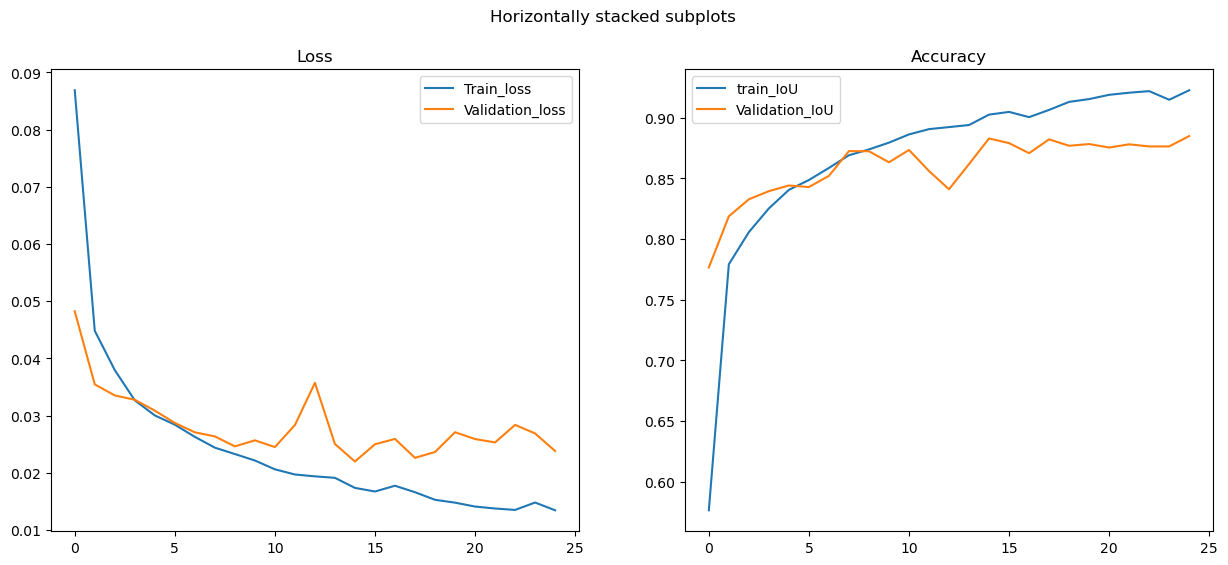

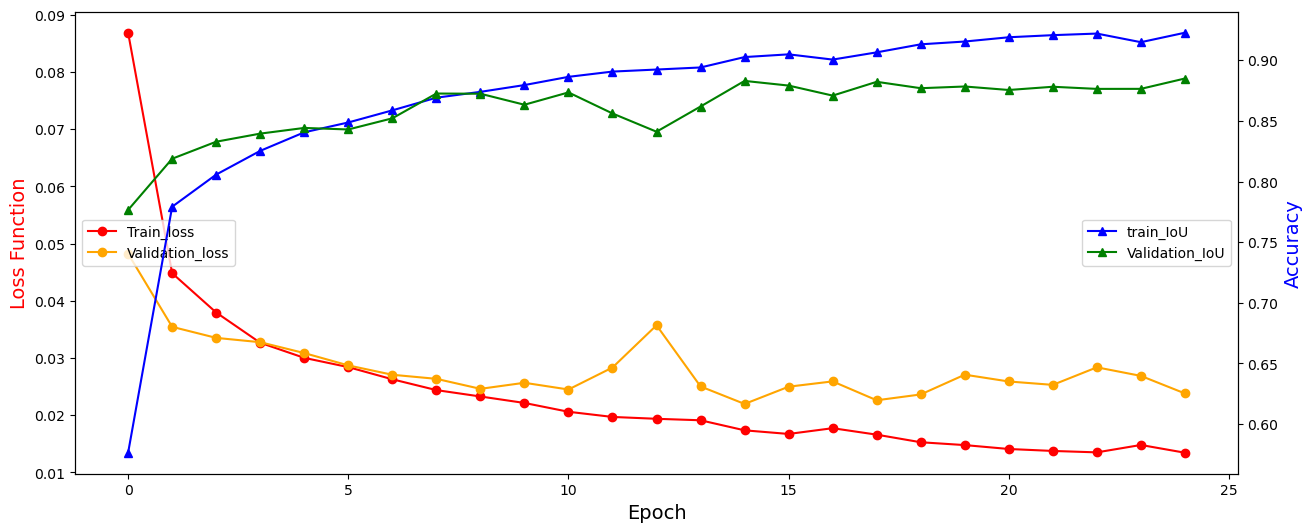

Current time: 30.315 minutes. Time expected till completion: 30.315 minutes

Epoch 26 of 50


100%|██████████| 20/20 [00:03<00:00,  6.23it/s]


train loss:  0.011497690999466513
Val loss:  0.026859846152365207
train IoU:  0.9333250568972693
Val IoU:  0.8804046541452408
Current time: 31.477 minutes. Time expected till completion: 29.056 minutes

Epoch 27 of 50


100%|██████████| 20/20 [00:03<00:00,  6.23it/s]


train loss:  0.010705550074473852
Val loss:  0.027100522164255382
train IoU:  0.9378292262554169
Val IoU:  0.8804991453886032
Current time: 32.646 minutes. Time expected till completion: 27.809 minutes

Epoch 28 of 50


100%|██████████| 20/20 [00:03<00:00,  6.18it/s]


train loss:  0.011820152112179332
Val loss:  0.0326190397143364
train IoU:  0.9315555221504636
Val IoU:  0.8682470619678497
Current time: 33.815 minutes. Time expected till completion: 26.569 minutes

Epoch 29 of 50


100%|██████████| 20/20 [00:03<00:00,  6.20it/s]


train loss:  0.010762452411775788
Val loss:  0.030471691815182566
train IoU:  0.9371277335617277
Val IoU:  0.8754728108644485
Current time: 34.984 minutes. Time expected till completion: 25.333 minutes

Epoch 30 of 50


100%|██████████| 20/20 [00:03<00:00,  6.25it/s]


train loss:  0.009488226716510124
Val loss:  0.02720980062149465
train IoU:  0.9445252007908291
Val IoU:  0.8815178334712982
Current time: 36.151 minutes. Time expected till completion: 24.101 minutes

Epoch 31 of 50


100%|██████████| 20/20 [00:03<00:00,  6.20it/s]


train loss:  0.008813764030734698
Val loss:  0.028945103380829097
train IoU:  0.9485449370410707
Val IoU:  0.8809216141700744
Current time: 37.320 minutes. Time expected till completion: 22.874 minutes

Epoch 32 of 50


100%|██████████| 20/20 [00:03<00:00,  6.22it/s]


train loss:  0.011066914898239903
Val loss:  0.02958151316270232
train IoU:  0.9361832108762529
Val IoU:  0.8785449415445328
Current time: 38.489 minutes. Time expected till completion: 21.650 minutes

Epoch 33 of 50


100%|██████████| 20/20 [00:03<00:00,  6.22it/s]


train loss:  0.008728465792309079
Val loss:  0.031076530972495676
train IoU:  0.9489118725061416
Val IoU:  0.8779052734375
Current time: 39.657 minutes. Time expected till completion: 20.430 minutes

Epoch 34 of 50


100%|██████████| 20/20 [00:03<00:00,  6.25it/s]


train loss:  0.007865339807338185
Val loss:  0.031036206986755133
train IoU:  0.9539071136050754
Val IoU:  0.8776753008365631
Current time: 40.825 minutes. Time expected till completion: 19.212 minutes

Epoch 35 of 50


100%|██████████| 20/20 [00:03<00:00,  6.23it/s]


train loss:  0.0073100670370169814
Val loss:  0.03331387173384428
train IoU:  0.9570186760690477
Val IoU:  0.878054341673851
Current time: 41.993 minutes. Time expected till completion: 17.997 minutes

Epoch 36 of 50


100%|██████████| 20/20 [00:03<00:00,  6.18it/s]


train loss:  0.006801212020218372
Val loss:  0.0329570684581995
train IoU:  0.9600695411364237
Val IoU:  0.8773695647716522
Current time: 43.162 minutes. Time expected till completion: 16.785 minutes

Epoch 37 of 50


100%|██████████| 20/20 [00:03<00:00,  6.24it/s]


train loss:  0.006638941753448711
Val loss:  0.03274131882935762
train IoU:  0.9609201216035419
Val IoU:  0.8829665899276733
Current time: 44.329 minutes. Time expected till completion: 15.575 minutes

Epoch 38 of 50


100%|██████████| 20/20 [00:03<00:00,  6.23it/s]


train loss:  0.006532098192514645
Val loss:  0.03539916560985148
train IoU:  0.9614303529262542
Val IoU:  0.8769416809082031
Current time: 45.498 minutes. Time expected till completion: 14.368 minutes

Epoch 39 of 50


100%|██████████| 20/20 [00:03<00:00,  6.23it/s]


train loss:  0.006228622331077026
Val loss:  0.034706410858780144
train IoU:  0.9632337659597396
Val IoU:  0.8810124188661576
Current time: 46.667 minutes. Time expected till completion: 13.162 minutes

Epoch 40 of 50


100%|██████████| 20/20 [00:03<00:00,  6.24it/s]


train loss:  0.006096861268290215
Val loss:  0.03485516346991062
train IoU:  0.9640843318568335
Val IoU:  0.8827765256166458
Current time: 47.835 minutes. Time expected till completion: 11.959 minutes

Epoch 41 of 50


100%|██████████| 20/20 [00:03<00:00,  6.20it/s]


train loss:  0.006064142144492103
Val loss:  0.034508856292814014
train IoU:  0.9641621414158079
Val IoU:  0.8823645323514938
Current time: 49.004 minutes. Time expected till completion: 10.757 minutes

Epoch 42 of 50


100%|██████████| 20/20 [00:03<00:00,  6.20it/s]


train loss:  0.005634441570792761
Val loss:  0.035565749276429415
train IoU:  0.9668331311808692
Val IoU:  0.8808528989553451
Current time: 50.173 minutes. Time expected till completion: 9.557 minutes

Epoch 43 of 50


100%|██████████| 20/20 [00:03<00:00,  6.25it/s]


train loss:  0.005517334136594501
Val loss:  0.03825278114527464
train IoU:  0.9674712704287635
Val IoU:  0.88103286921978
Current time: 51.342 minutes. Time expected till completion: 8.358 minutes

Epoch 44 of 50


100%|██████████| 20/20 [00:03<00:00,  6.18it/s]


train loss:  0.005382071634651058
Val loss:  0.034122086223214866
train IoU:  0.9682225131326252
Val IoU:  0.8857493758201599
Current time: 52.510 minutes. Time expected till completion: 7.161 minutes

Epoch 45 of 50


100%|██████████| 20/20 [00:03<00:00,  6.22it/s]


train loss:  0.005299489399314754
Val loss:  0.039892909582704306
train IoU:  0.9687084217866262
Val IoU:  0.8803414106369019
Current time: 53.678 minutes. Time expected till completion: 5.964 minutes

Epoch 46 of 50


100%|██████████| 20/20 [00:03<00:00,  6.22it/s]


train loss:  0.005296515797575315
Val loss:  0.03639272395521402
train IoU:  0.9686538332038456
Val IoU:  0.8848063528537751
Current time: 54.846 minutes. Time expected till completion: 4.769 minutes

Epoch 47 of 50


100%|██████████| 20/20 [00:03<00:00,  6.22it/s]


train loss:  0.005124737066216767
Val loss:  0.03761758739128709
train IoU:  0.9696219113137987
Val IoU:  0.882185086607933
Current time: 56.016 minutes. Time expected till completion: 3.575 minutes

Epoch 48 of 50


100%|██████████| 20/20 [00:03<00:00,  6.24it/s]


train loss:  0.004956088264265822
Val loss:  0.04100613128393889
train IoU:  0.9706082814269595
Val IoU:  0.8815181612968445
Current time: 57.184 minutes. Time expected till completion: 2.383 minutes

Epoch 49 of 50


100%|██████████| 20/20 [00:03<00:00,  6.17it/s]


train loss:  0.004869955171468771
Val loss:  0.04007156854495406
train IoU:  0.9712129986948437
Val IoU:  0.8825088798999786
Current time: 58.352 minutes. Time expected till completion: 1.191 minutes

Epoch 50 of 50


100%|██████████| 20/20 [00:03<00:00,  6.21it/s]


train loss:  0.00480364067091917
Val loss:  0.043028895184397696
train IoU:  0.97155897948477
Val IoU:  0.8819209903478622
Saving model checkpoint


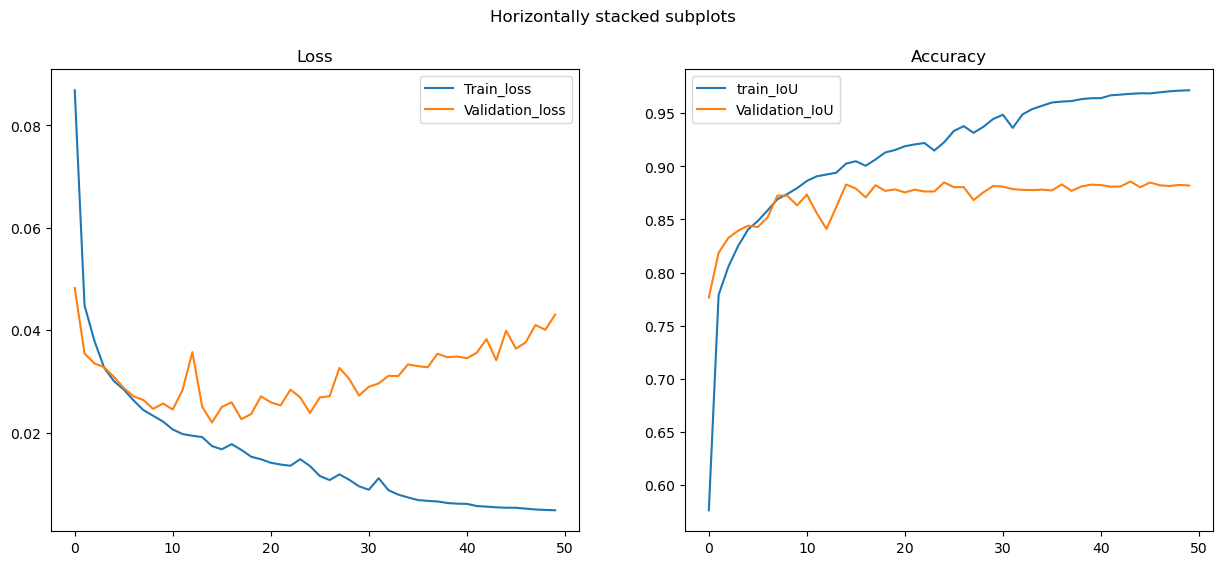

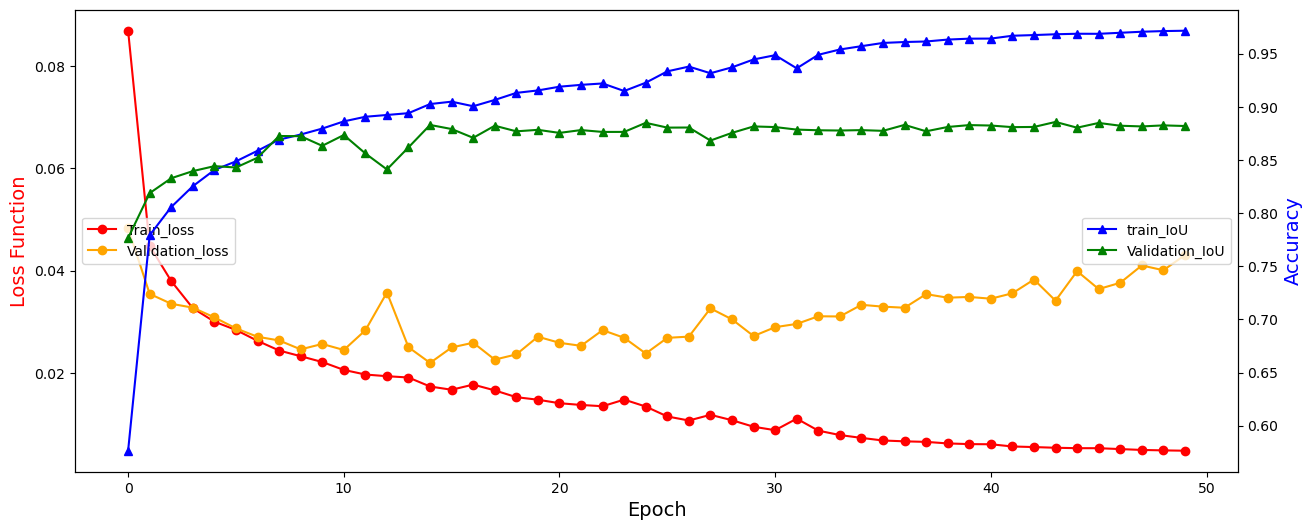

Current time: 59.544 minutes. Time expected till completion: 0.000 minutes
Finished training in: 59.544 minutes


In [16]:

# Main
train_loss, val_loss = [], []
train_IoU, val_IoU = [], []

# Load checkpoints
names = os.listdir(model_checkpoints)
for elem in names:
    if(elem=="metrics_losss_accuracy.csv"):
        print("Loading Metrics")
        dd = pd.read_csv(model_checkpoints + "metrics_losss_accuracy.csv")
        train_loss = dd["train_loss"].tolist()
        val_loss = dd["val_loss"].tolist()
        train_IoU = dd["train_IoU"].tolist()
        val_IoU = dd["val_IoU"].tolist()
        
# count time
start = time.time()
#PyTorch - Training the Model
for epoch in range(epoch_check, epochs):
    print()
    # Print current epoch
    print(f"Epoch {epoch + 1} of {epochs}")
    
    # Train model
    modelpy.train()
    running_loss=0
    total=0
    accumulatedIoU=0
    # loop for every training batch (one epoch)
    for bi, data in tqdm(enumerate(train_loader), total=len(train_loader)): # use tqdm package to track running time
        # Get the tensors
        images = data[0].to(device)# use the gpu
        labels = data[2].to(device)# use the gpu
        
        #create the output from the CNN base on the give batch images
        out = modelpy(images)
        # count the loss function 
        loss = criterion(out, labels)
        
        ######################
        optim.zero_grad()
        ######################
        # count the backpropagation
        loss.backward()
        # learning
        optim.step()
        
        
        # add new value to the main loss
        running_loss += loss.item()
        
        # calculate IoU
        predictions = torch.argmax(out, dim=1)
        total += labels.size(0)
        
        iioouu = calculate_IoU(predictions, labels)
        accumulatedIoU += iioouu.sum().item()
    
    train_epoch_loss = running_loss/len(train_loader.dataset)
    train_epoch_IoU = accumulatedIoU/total
    
    
    modelpy.eval()
    running_loss = 0.0
    total=0
    accumulatedIoU=0
    with torch.no_grad():
        for bi, data in tqdm(enumerate(valid_loader), total=len(valid_loader)):
            # Get the tensors
            images = data[0].to(device)# use the gpu
            labels = data[2].to(device)# use the gpu
            
            #create the output from the CNN base on the give batch images
            outputs = modelpy(images)
            # count the loss function
            loss = criterion(outputs, labels)
            
            # Add loss of each item (total items in a batch = batch size) .
            running_loss += loss.item()
            
            # calculate IoU
            predictions = torch.argmax(outputs, dim=1)
            total += labels.size(0)

            iioouu = calculate_IoU(predictions, labels)
            accumulatedIoU += iioouu.sum().item()
           
    val_epoch_loss = running_loss/len(valid_loader.dataset) 
    val_epoch_IoU = accumulatedIoU/total

    
    print("train loss: ", train_epoch_loss)
    print("Val loss: ", val_epoch_loss)
    print("train IoU: ", train_epoch_IoU)
    print("Val IoU: ", val_epoch_IoU)

    
    # save results
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    train_IoU.append(train_epoch_IoU)
    val_IoU.append(val_epoch_IoU)
    
    # Save model with all information every 100 epochs. Can be used 
    # resuming training. optim
    if (epoch+1) % checkpoints_save == 0: # checkpoints_save
        # Save Model
        print("Saving model checkpoint")
        end = time.time()
        time_elapsed = (end-start)+previous_time
        save_model(epoch, time_elapsed, modelpy, optim, criterion, path = model_checkpoints + "model_ckpt.pth")
        # save the metrics
        save_metrics(train_loss, val_loss, train_IoU, val_IoU, path = model_checkpoints + "metrics_losss_accuracy.csv")
        
        # save model at epoch
        save_model(epoch, time_elapsed, modelpy, optim, criterion, path = model_checkpoints + "model_ckpt_"+str(epoch+1)+".pth")
        
        # Cheack the evolution at this point
        plot_loss_accuracy(train_loss, val_loss, train_IoU, val_IoU)
        
        
    ep_time = time.time()
    print(f"Current time: {(((ep_time-start)+previous_time)/60):.3f} minutes. Time expected till completion: {(((((ep_time-start)+previous_time)/(epoch + 1)) * (epochs-(epoch + 1)))/60):.3f} minutes")
    
end = time.time()
print(f"Finished training in: {(((end-start)+previous_time)/60):.3f} minutes") 

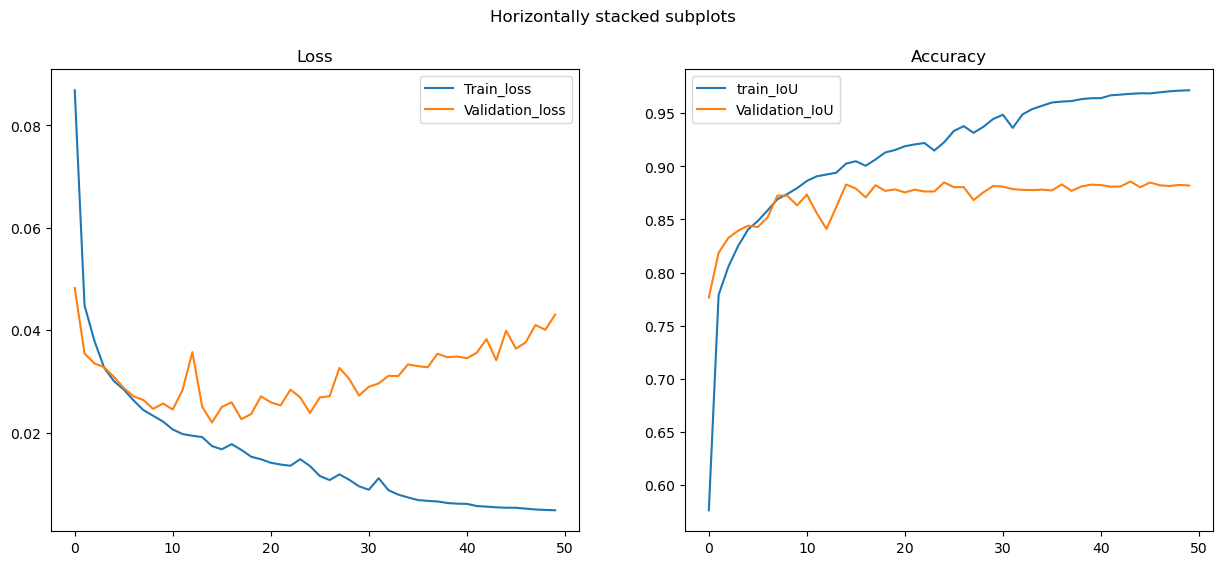

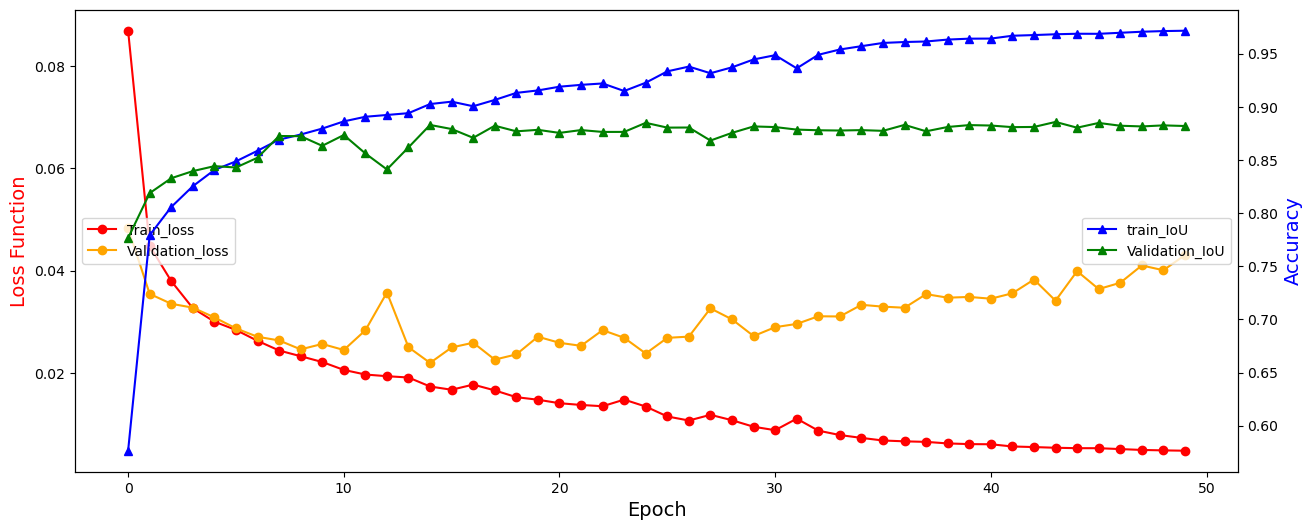

In [17]:
plot_loss_accuracy(train_loss, val_loss, train_IoU, val_IoU)

## Save Model

In [18]:
# Save Model
NAME = "model_1.pt"

torch.save(modelpy.state_dict(), model_checkpoints+NAME)

## Load Model

In [14]:

# Load the model
NAME = "model_1.pt"
modelpy.load_state_dict(torch.load(model_checkpoints+NAME, map_location=device))


<All keys matched successfully>

# 3.Evaluate your model using the test images

In [15]:
invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                               ])

In [16]:
test_data, test_mask, test_labels = import_folder_dataset(root_path = test_data_path, resized_side = img_size)#(1024,1024)


print("Dim of Data: ", test_data.shape)
print("Dim of Mask: ", test_mask.shape)
print("Dim of Lables: ", test_labels.shape)

100%|██████████| 200/200 [00:15<00:00, 13.14it/s]

Dim of Data:  (200, 256, 256, 3)
Dim of Mask:  (200, 256, 256, 3)
Dim of Lables:  (200, 256, 256)


In [17]:
# Create the dataset object
test_Dataset = Data(test_data, test_mask, test_labels, img_transform) 


print("Test len: ",len(test_Dataset))

Test len:  200


In [18]:
test_loader = DataLoader(
    test_Dataset, 
    batch_size=1,
    shuffle=False
    )

In [19]:

mean_IoU, mean_dice, image_list, mask_list, predictions_list = make_predictions(loader = test_loader, 
                                                                     model = modelpy, 
                                                                     invTransforamtion = invTrans,
                                                                     device = device)
print(f'Average IoU of the model on the 200 Test dataset instances: {100 * mean_IoU}%')
print(f'Average Dice of the model on the 200 Test dataset instances: {100 * mean_dice}%')

100%|██████████| 200/200 [00:48<00:00,  4.09it/s]

Average IoU of the model on the 200 Test dataset instances: 89.5506879389286%
Average Dice of the model on the 200 Test dataset instances: 94.43035444617271%


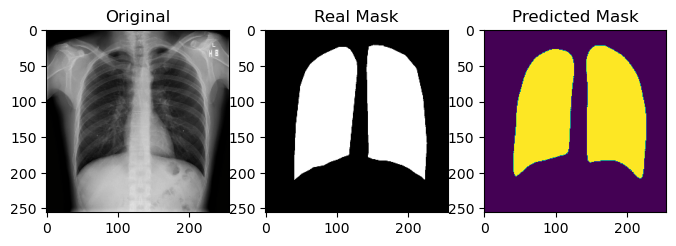

In [20]:
image_to_plot = 10

real_image = image_list[image_to_plot]
real_mask = mask_list[image_to_plot]
pred_mask = predictions_list[image_to_plot]

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(8,8))
ax1.imshow(real_image)
ax1.title.set_text("Original")
ax2.imshow(real_mask)
ax2.title.set_text("Real Mask")
ax3.imshow(pred_mask)
ax3.title.set_text("Predicted Mask")
plt.show()

# 4. Your IoU score should be higher than 0.82

In [21]:
print(f'Average IoU of the model on the 200 Test dataset instances: {100 * mean_IoU}%')

Average IoU of the model on the 200 Test dataset instances: 89.5506879389286%


In [22]:
print(f'Average Dice of the model on the 200 Test dataset instances: {100 * mean_dice}%')

Average Dice of the model on the 200 Test dataset instances: 94.43035444617271%


# 5. Write a two-page report using LaTex and upload your paper to ResearchGate or Arxiv. 
